# NEW STUFF

In [55]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dir_names = "4zw9 4zw9_asp89 4zw9_trp331 5eqi 5eqi_asp91 5eqi_trp333".split(" ")
label_names = dir_names
names = dict(zip(dir_names, label_names))
    

rmsf_dataset = []
for protein in dir_names:
    structure = protein[0:4]
    for i in range(3):
        path = f"rmsf/" + f"{protein}_rep{i+1}.xvg"
        if not os.path.isfile(path):
            print(f"{path} not found. Continue.")
            continue

        x, y = np.loadtxt(path, comments=["@", "#"], unpack=True)
        for x_item, y_item in zip(x, y):
            rmsf_dataset.append({"protein"  : protein,
                                        "structure": structure,
                                        "rep"      : str(i+1),
                                        "atom"     : x_item,
                                        "rmsf"     : y_item,
                                    })


rmsf_dataset_df = pd.DataFrame(rmsf_dataset)
rmsf_dataset_df['test'] = rmsf_dataset_df['protein'] + "_rep" + rmsf_dataset_df['rep']

(400.0, 600.0)

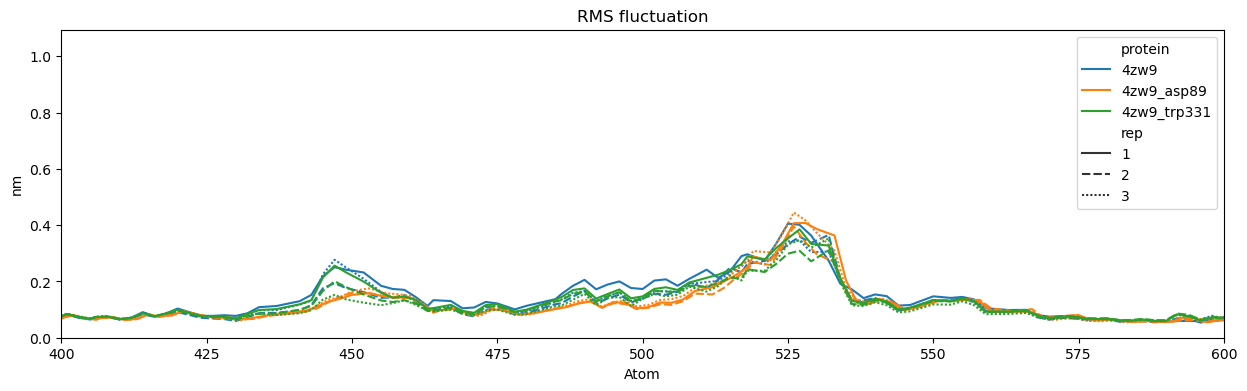

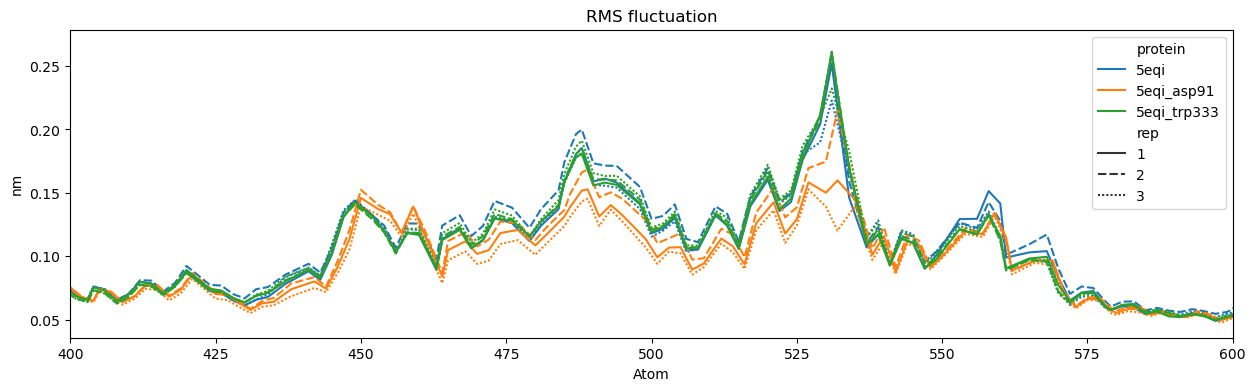

In [67]:
import seaborn as sns
struc1 = rmsf_dataset_df[(rmsf_dataset_df['structure'] == "4zw9") ]

plt.rcParams["figure.figsize"] = (15,4)

ax = sns.lineplot(data=struc1, x='atom', y='rmsf', hue='protein', style='rep')
ax.set_xlabel("Atom")
ax.set_ylabel("nm")
ax.set_title("RMS fluctuation")
ax.set_xlim(400, 600)

plt.figure()

struc1 = rmsf_dataset_df[(rmsf_dataset_df['structure'] == "5eqi") ]

ax = sns.lineplot(data=struc1, x='atom', y='rmsf', hue='protein', style='rep')
ax.set_xlabel("Atom")
ax.set_ylabel("nm")
ax.set_title("RMS fluctuation")
ax.set_xlim(400, 600)
